In [303]:
import pandas as pd

실적데이터 = pd.read_excel('빅콘홈쇼핑.xlsx', header=1)
시청률데이터 = pd.read_excel('시청률데이터.xlsx',header=1)
평가데이터 = pd.read_excel('평가데이터.xlsx',header=1)

In [310]:
#pd.pivot_table(실적데이터,index='방송날짜',values='주문량',aggfunc='sum')

,주문량
방송날짜,
2019-01-01,36326.952820
2019-01-02,28589.281389
2019-01-03,27534.941901
2019-01-04,30233.381266
2019-01-05,32935.714225
...,...
2019-12-27,38497.527750
2019-12-28,41862.657133
2019-12-29,37007.953870


In [113]:
실적데이터

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [305]:
# 노출(분)컬럼 이름 변경
실적데이터.rename(columns={'노출(분)':'노출분'},inplace=True)

# 취급액 NaN값 0으로 채우기
실적데이터.취급액.fillna(0,inplace=True)

#2019년 데이터만 
실적데이터=실적데이터[실적데이터.방송일시<'2020-01-01']

#노출분 nan값은 위에 시간이랑 일치시키기
실적데이터.노출분.fillna(method='pad',inplace=True)

C:\Users\daum1\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [306]:
#주문량 변수 생성
실적데이터['주문량'] = (실적데이터.취급액/실적데이터.판매단가).fillna(0)

<ipython-input-306-4fa33a8310ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['주문량'] = (실적데이터.취급액/실적데이터.판매단가).fillna(0)


In [307]:
#방송일시를 사용해서 월,일,요일,시간 생성
실적데이터['월']=실적데이터.방송일시.dt.month
실적데이터['일']=실적데이터.방송일시.dt.day
실적데이터['요일']=실적데이터.방송일시.dt.weekday
실적데이터['시간']=실적데이터.방송일시.dt.time

<ipython-input-307-f393a3b2d1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['월']=실적데이터.방송일시.dt.month
<ipython-input-307-f393a3b2d1ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['일']=실적데이터.방송일시.dt.day
<ipython-input-307-f393a3b2d1ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [308]:
#하루 시간단위로 바꾼후 방송 시작시간
실적데이터['시간'] = 실적데이터.시간.apply(lambda x : str(x)).apply(lambda x : int(x.split(':')[0])*60 + int(x.split(':')[1]))

<ipython-input-308-4ad191127f4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['시간'] = 실적데이터.시간.apply(lambda x : str(x)).apply(lambda x : int(x.split(':')[0])*60 + int(x.split(':')[1]))


In [309]:
#방송날짜 생성
실적데이터['방송날짜'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])
#방송 시간 생성
실적데이터['방송시간'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:-3])

<ipython-input-309-42d4aa3c7616>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['방송날짜'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[0])
<ipython-input-309-42d4aa3c7616>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['방송시간'] = 실적데이터.방송일시.apply(lambda x : str(x)).apply(lambda x : x.split(' ')[1][:-3])


In [119]:
시청률데이터.set_index('시간대', inplace=True)
#시청률데이터 불필요 평균값 제거
시청률데이터.drop('월화수목금토일02:00-01:59',inplace=True)
시청률데이터.drop('2019-01-01 to 2019-12-31',axis=1,inplace=True)


In [120]:

시청률데이터

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [121]:
#분당시청률평균 구하기
import datetime

분당평균시청률=[]
for i in range(len(실적데이터)):
    시작=실적데이터.방송시간.iloc[i]
    종료=str(pd.to_datetime(실적데이터.방송시간.iloc[i])+datetime.timedelta(minutes=round(float(실적데이터.노출분.iloc[i]),0)-1)).split(" ")[1][:-3]
    분당평균시청률.append((시청률데이터[실적데이터.방송날짜.iloc[i]].loc[시작:종료].mean()))
    
분당평균시청률

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0017500000000000003,
 0.0,
 0.0005499999999999999,
 0.00015000000000000001,
 0.0005499999999999999,
 0.004149999999999999,
 0.006150000000000001,
 0.0,
 0.0,
 0.0075,
 0.010000000000000002,
 0.010000000000000002,
 0.010000000000000004,
 0.010000000000000004,
 0.005900000000000001,
 0.005900000000000001,
 0.0033666666666666667,
 0.0033666666666666667,
 0.008400000000000001,
 0.012900000000000003,
 0.012,
 0.007600000000000001,
 0.0005,
 0.0030499999999999998,
 0.0007,
 0.0008500000000000001,
 0.0,
 0.0,
 0.013500000000000002,
 0.020149999999999998,
 0.0021,
 0.0021000000000000003,
 0.0,
 0.0,
 0.0,
 0.00035,
 0.00035,
 0.001,
 0.001,
 0.0,
 0.0007,
 0.0066,
 0.0008,
 0.005933333333333333,
 0.00095,
 0.0006000000000000001,
 0.0,
 0.005900000000000001,
 0.005900000000000001,
 0.007050000000000001,
 0.007050000000000001,
 0.0007,
 0.0007,
 0.00195,
 0.0,
 0.0,
 0.0006000000000000001,
 0.00015000000000000001,
 0.0010999999

In [122]:
#방송최고시청률 구하기
import datetime

방송최고시청률=[]
for i in range(len(실적데이터)):
    시작=실적데이터.방송시간.iloc[i]
    종료=str(pd.to_datetime(실적데이터.방송시간.iloc[i])+datetime.timedelta(minutes=round(float(실적데이터.노출분.iloc[i]),0)-1)).split(" ")[1][:-3]
    방송최고시청률.append((시청률데이터[실적데이터.방송날짜.iloc[i]].loc[시작:종료].max()))
    
방송최고시청률

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.035,
 0.0,
 0.011,
 0.003,
 0.011,
 0.029,
 0.039,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.024,
 0.024,
 0.049,
 0.049,
 0.026,
 0.049,
 0.069,
 0.037,
 0.005,
 0.031,
 0.014,
 0.012,
 0.0,
 0.0,
 0.03,
 0.051,
 0.03,
 0.013,
 0.0,
 0.0,
 0.0,
 0.007,
 0.007,
 0.01,
 0.01,
 0.0,
 0.014,
 0.06,
 0.024,
 0.03,
 0.019,
 0.012,
 0.0,
 0.04,
 0.04,
 0.047,
 0.047,
 0.014,
 0.014,
 0.015,
 0.0,
 0.0,
 0.009,
 0.003,
 0.011,
 0.0,
 0.0,
 0.0,
 0.014,
 0.039,
 0.021,
 0.0,
 0.0,
 0.03,
 0.017,
 0.017,
 0.017,
 0.017,
 0.026,
 0.026,
 0.026,
 0.026,
 0.017,
 0.017,
 0.017,
 0.017,
 0.058,
 0.048,
 0.013,
 0.013,
 0.013,
 0.013,
 0.036,
 0.036,
 0.036,
 0.036,
 0.037,
 0.037,
 0.037,
 0.037,
 0.014,
 0.022,
 0.066,
 0.022,
 0.012,
 0.056,
 0.027,
 0.03,
 0.03,
 0.03,
 0.007,
 0.007,
 0.011,
 0.011,
 0.033,
 0.021,
 0.007,
 0.009,
 0.048,
 0.073,
 0.0,
 0.023,
 0.03,
 0.009,
 0.009,
 0.009,
 0.0,
 0.0,
 0.0,
 0.018,
 0

In [123]:
len(분당평균시청률)

38300

In [124]:
실적데이터['분당평균시청률']=분당평균시청률

실적데이터['방송최고시청률']=방송최고시청률

<ipython-input-124-c7b967d692d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['분당평균시청률']=분당평균시청률
<ipython-input-124-c7b967d692d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['방송최고시청률']=방송최고시청률


In [302]:
실적데이터

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,분당평균시청률,방송최고시청률,시간대,월9,평균최고기온,평균최저기온,평균일강수량,최대풍속,Hot_ime,상품가격대
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,2099000.0,52.606516,1,...,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0,0,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,4371000.0,109.548872,1,...,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0,0,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,3262000.0,81.754386,1,...,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0,0,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,6955000.0,174.310777,1,...,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0,0,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,6672000.0,167.218045,1,...,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,1.480,1664000.0,11.243243,12,...,0.0000,0.0,저녁2,1,0.4,-6.7,0.1,21.9,0,2
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,1.780,9149000.0,51.398876,12,...,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9,0,2
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,1.680,15282000.0,90.964286,12,...,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9,0,2
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,1.580,2328000.0,14.734177,12,...,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9,0,2


In [126]:
# 3시간 단위로 시간대 세분화
시간대 = []
for i in range(len(실적데이터['방송시간'])):
    time = int(실적데이터['방송시간'][i][:2])
    
    if time>=0 and time<3:
        시간대.append('새벽1')
    if time>=3 and time<6:
        시간대.append('새벽2')    
    if time>=6 and time<9:
        시간대.append('오전1')
    if time>=9 and time<12:
        시간대.append('오전2')
    if time>=12 and time<15:
        시간대.append('오후1')
    if time>=15 and time<18:
        시간대.append('오후2')
    if time>=18 and time<21:
        시간대.append('저녁1')
    if time>=21 and time<24:
        시간대.append('저녁2')
        
실적데이터['시간대'] = 시간대

<ipython-input-126-29bcf3b51dc1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['시간대'] = 시간대


In [127]:
##  판매량이 9일부터 오른다

#월9=[]
#for i in 실적데이터.월:
 #   if i < 9:
  #      월9.append(0)
   # elif i >=9:
    #    월9.append(1)
    

In [128]:
월9

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [130]:
실적데이터

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,일,요일,시간,방송날짜,방송시간,분당평균시청률,방송최고시청률,시간대
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,1,1,1,360,2019-01-01,06:00,0.0000,0.000,오전1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,1,1,1,360,2019-01-01,06:00,0.0000,0.000,오전1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,1,1,1,380,2019-01-01,06:20,0.0000,0.000,오전1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,1,1,1,380,2019-01-01,06:20,0.0000,0.000,오전1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,1,1,1,400,2019-01-01,06:40,0.0000,0.000,오전1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,11.243243,12,31,1,1400,2019-12-31,23:20,0.0000,0.000,저녁2
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,51.398876,12,31,1,1420,2019-12-31,23:40,0.0206,0.038,저녁2
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,90.964286,12,31,1,1420,2019-12-31,23:40,0.0206,0.038,저녁2
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,14.734177,12,31,1,1420,2019-12-31,23:40,0.0206,0.038,저녁2


In [131]:
## 9월 이상 컬럼 추가

#실적데이터['월9'] = 월9

<ipython-input-131-7f874ec40f2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적데이터['월9'] = 월9


## 기온데이터 추가

In [132]:
import pandas as pd
기온 = pd.read_csv('기온1.csv', header = 0,sep=",", encoding = 'euc-kr')
풍속 = pd.read_csv('풍속.csv', encoding = 'euc-kr')
강수량 = pd.read_csv('강수량.csv', encoding = 'euc-kr')

# 일별로 정렬
기온.sort_values(by= '일시',inplace=True)
풍속.sort_values(by= '일시',inplace=True)
강수량.sort_values(by= '일시',inplace=True)

# 인덱스 값 재정렬
기온.index=list(range(365))
풍속.index=list(range(365))
강수량.index=list(range(365))


In [ ]:
#쓰기로한 데이터만 남기기
기온.drop(['평균기온(℃)','최고기온(℃)','최저기온(℃)'],axis=1,inplace=True) # 평균최고, 평균 최저
풍속.drop(['평균풍속(m/s)','최대순간풍속(m/s)'],axis=1,inplace=True) # 최대풍속(m/s)
강수량.drop(['최다일강수량(mm)'],axis=1,inplace=True)

#풍속 값 다시 맞추기(merge 시키기 위해)
풍속.일시=pd.to_datetime(풍속.일시).map(lambda x : str(x).split(" ")[0])
#실적데이터 방송날짜 이름 변경(merge 시키기 위해))
실적데이터.rename({'방송날짜':'일시'},axis='columns',inplace=True)

실적데이터=pd.merge(실적데이터, 기온, on='일시')
실적데이터=pd.merge(실적데이터, 강수량, on='일시')
실적데이터=pd.merge(실적데이터, 풍속, on='일시')

In [148]:
실적데이터.rename(columns={'평균최고기온(℃)':'평균최고기온'},inplace=True)
실적데이터.rename(columns={'평균최저기온(℃)':'평균최저기온'},inplace=True)
실적데이터.rename(columns={'평균일강수량(mm)':'평균일강수량'},inplace=True)
실적데이터.rename(columns={'최대풍속(m/s)':'최대풍속'},inplace=True)

In [149]:
실적데이터

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,일시,방송시간,분당평균시청률,방송최고시청률,시간대,월9,평균최고기온,평균최저기온,평균일강수량,최대풍속
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,2099000.0,52.606516,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,4371000.0,109.548872,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,3262000.0,81.754386,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,6955000.0,174.310777,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,6672000.0,167.218045,1,...,2019-01-01,06:40,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,1.480,1664000.0,11.243243,12,...,2019-12-31,23:20,0.0000,0.0,저녁2,1,0.4,-6.7,0.1,21.9
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,1.780,9149000.0,51.398876,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,1.680,15282000.0,90.964286,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,1.580,2328000.0,14.734177,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9


In [135]:
실적데이터.방송최고시청률 = 실적데이터.방송최고시청률*100
실적데이터.판매단가 = 실적데이터.판매단가/100000

In [136]:
## 월9 더미처리




## 실적데이터 학습모델 돌리기 위한 가공

In [137]:
실적수치데이터 =  실적데이터.copy()

## 변수 더미처리
실적수치데이터[pd.get_dummies(실적수치데이터['상품군']).columns] = pd.get_dummies(실적수치데이터['상품군'])
실적수치데이터[pd.get_dummies(실적수치데이터['요일']).columns] = pd.get_dummies(실적수치데이터['요일'])
실적수치데이터[pd.get_dummies(실적수치데이터['시간대']).columns] = pd.get_dummies(실적수치데이터['시간대'])
#실적수치데이터[pd.get_dummies(실적수치데이터['월9']).columns] = pd.get_dummies(실적수치데이터['월9'])

실적수치데이터[pd.get_dummies(실적수치데이터['마더코드']).columns] = pd.get_dummies(실적수치데이터['마더코드'])
실적수치데이터[pd.get_dummies(실적수치데이터['상품코드']).columns] = pd.get_dummies(실적수치데이터['상품코드'])
실적수치데이터.drop(['마더코드','상품코드'],axis=1, inplace=True)


실적수치데이터.drop(['방송일시','상품명','일시','요일','시간대','상품군','방송시간','취급액'],axis=1,inplace=True)

In [138]:
실적수치데이터.columns

Index([      '노출분',      '판매단가',       '주문량',         '월',         '일',
              '시간',   '분당평균시청률',   '방송최고시청률',        '월9', '평균최고기온(℃)',
       ...
            202501,      202502,      202503,      202504,      202505,
            202508,      202509,      202510,      202512,      202513],
      dtype='object', length=2875)

In [140]:
## 데이터정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fitted = scaler.fit(실적수치데이터)
정규화데이터 = scaler.transform(실적수치데이터)
정규화데이터 = pd.DataFrame(정규화데이터, columns=실적수치데이터.columns, index=list(실적수치데이터.index.values))


In [141]:
정규화데이터.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38300 entries, 0 to 38299
Columns: 2875 entries, 노출분 to 202513
dtypes: float64(2875)
memory usage: 840.4 MB


## 랜덤포레스트

In [144]:
from sklearn.model_selection import train_test_split

X = 정규화데이터.drop(['주문량','분당평균시청률','시간','월9'],axis=1)
y = 정규화데이터.주문량

X_train, X_test, y_train, y_test = train_test_split (X, y,
                                        test_size = 0.2, random_state = 42)

In [168]:
## 상품가격대 4등급으로 쪼갠 후 학습

상품가격 = pd.qcut(정규화데이터.판매단가,4)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
상품가격대 = le.fit_transform(상품가격)

정규화데이터['상품가격대'] = 상품가격대


from sklearn.model_selection import StratifiedShuffleSplit
shuffledSplit = StratifiedShuffleSplit(test_size = 0.3)
for train_idx, test_idx in shuffledSplit.split(정규화데이터,정규화데이터.상품가격대):
    train_set = 정규화데이터.loc[train_idx]
    test_set = 정규화데이터.loc[test_idx]
    
train_set.drop('상품가격대', axis=1, inplace = True)
test_set.drop('상품가격대', axis=1, inplace = True)


X_train = train_set.drop('주문량',axis=1)
y_train = train_set.주문량
X_test = test_set.drop('주문량',axis=1)
y_test = test_set.주문량

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #최적화를 위해
import sklearn.metrics as mt
# randomforest
rf_reg = RandomForestRegressor().fit(X_train,y_train)
#학습
#rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)

#평가
#print(rf_reg.score(X_train, y_train))

#print(rf_reg.score(X_test, y_test))
print(mt.r2_score(y_test, y_pred))  #시간 뺴고 0.746538/ # 월9추가 0.7426/ #상품코드마더코드 컬럼 0.742617/ # 상품가격 6등분0.79162
# 판매단가 *100000 하고 0.747286 / 판매단가 등분하고 0.78017

0.7801792709030214
0.7801792709030214


In [75]:
# 최적화를 위한 GridSearch 진행
#객체생성
rf_reg = RandomForestRegressor()

rf_params = {'n_estimators':[300,700,800],  #800:0.32828/ 1000:.33533/20000:0.33533
            'max_depth':[7,9,12],
             #'max_features':[4,8]
            'n_jobs' : [-1]}

grid_reg = GridSearchCV(rf_reg, param_grid = rf_params, cv = 5)

#학습
grid_reg.fit(X_train,y_train)

#평가
#print(grid_reg.score(X_train, y_train))
mt.r2_score(y_pred, y_test)

KeyboardInterrupt: 

## XGBoost

In [286]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimator = 1000, learning_rate=0.4,
                      max_depth = 7, n_jobs=-1)

xgb_reg.fit(X_train, y_train) # early_stopping_rounds=200,
         # eval_set = [(X_test, y_test)], eval_metric='logloss')


xgb_reg.score(X_test, y_test)  #시간뺴고 월9뺴고 사마코드컬럼 상품가격6등분 0.83057
# 6등분 안하고 판매단가*100000 

[16:08:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.7862357787341314

## 다층퍼셉트론

In [ ]:

import sklearn.neural_network as nn

ppn_reg = nn.MLPRegressor(learning_rate_init=0.4,\
                         max_iter = 1000,\
                         activation='relu', hidden_layer_sizes=(50,40,30))

reg = ppn_reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mt.r2_score(y_pred, y_test)

In [31]:
from sklearn.model_selection import train_test_split

X = 정규화데이터.drop(['주문량','분당평균시청률'],axis=1)
y = 정규화데이터.주문량

X_train, X_test, y_train, y_test = train_test_split (X, y,
                                        test_size = 0.2, random_state = 42)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)


import sklearn.neural_network as nn

ppn_reg = nn.MLPRegressor(learning_rate_init=0.4,\
                         max_iter = 1000,\
                         activation='relu') #hidden_layer_sizes=(50,40,30))

reg = ppn_reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mt.r2_score(y_pred, y_test)

-5.732479660824764e+31

## 회귀트리

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

mt.r2_score(y_pred, y_test)

0.6504212574625683

## 심층신경망

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=33))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, y_train,\
         epochs=50,\
         batch_size=100,\
         verbose=2)

In [42]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [43]:
data = pd.pivot_table(실적수치데이터,index=['월'], values = ['주문량'],aggfunc='mean')

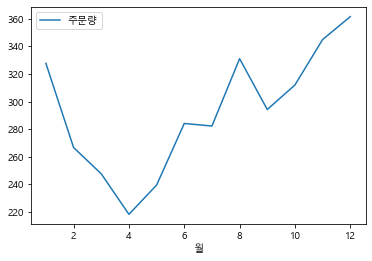

In [44]:
data.plot()

In [273]:
강수량주문량 = pd.pivot_table(실적데이터, index='평균최고기온',values='주문량',aggfunc='min')

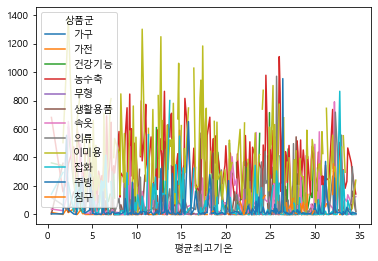

In [284]:
강수량주문량.plot()




In [291]:
data1 = pd.pivot_table(실적데이터,index=['평균최저기온'],columns=['상품군'].의류, values = ['주문량'],aggfunc='mean')

AttributeError: 'list' object has no attribute '의류'

C:\Users\daum1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daum1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


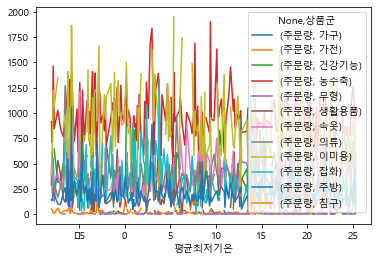

In [290]:
data1.plot()

In [160]:
실적데이터

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,일시,방송시간,분당평균시청률,방송최고시청률,시간대,월9,평균최고기온,평균최저기온,평균일강수량,최대풍속
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,2099000.0,52.606516,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,4371000.0,109.548872,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,3262000.0,81.754386,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,6955000.0,174.310777,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,6672000.0,167.218045,1,...,2019-01-01,06:40,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,1.480,1664000.0,11.243243,12,...,2019-12-31,23:20,0.0000,0.0,저녁2,1,0.4,-6.7,0.1,21.9
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,1.780,9149000.0,51.398876,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,1.680,15282000.0,90.964286,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,1.580,2328000.0,14.734177,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9


In [165]:
data = 실적데이터.pivot_table(index='평균최저기온', values='주문량', aggfunc='mean')

In [172]:
실적데이터

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,일시,방송시간,분당평균시청률,방송최고시청률,시간대,월9,평균최고기온,평균최저기온,평균일강수량,최대풍속
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,2099000.0,52.606516,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,4371000.0,109.548872,1,...,2019-01-01,06:00,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,3262000.0,81.754386,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,0.399,6955000.0,174.310777,1,...,2019-01-01,06:20,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,0.399,6672000.0,167.218045,1,...,2019-01-01,06:40,0.0000,0.0,오전1,0,2.1,-5.8,0.1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,1.480,1664000.0,11.243243,12,...,2019-12-31,23:20,0.0000,0.0,저녁2,1,0.4,-6.7,0.1,21.9
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,1.780,9149000.0,51.398876,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,1.680,15282000.0,90.964286,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,1.580,2328000.0,14.734177,12,...,2019-12-31,23:40,0.0206,3.8,저녁2,1,0.4,-6.7,0.1,21.9


C:\Users\daum1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\daum1\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


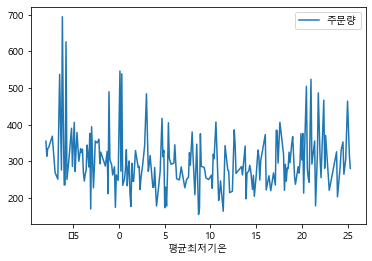

In [166]:
data.plot()

In [178]:
주말드라마시간 = 실적데이터['요일'] > 4

In [216]:
주말드라마시간2 = 1160 < 실적데이터['시간']  #드라마 끝나는 시간1275 ... 1280

In [217]:
주말드라마 = 실적데이터[주말드라마시간 & 주말드라마시간2]

In [218]:
주말드라마

,방송일시,노출분,마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,일시,방송시간,분당평균시청률,방송최고시청률,시간대,월9,평균최고기온,평균최저기온,평균일강수량,최대풍속
401,2019-01-05 19:40:00,20.0,100448,202098,일시불 쿠첸 풀스텐 압력밥솥 10인용 (A1),주방,1.58,52106000.0,329.784810,1,...,2019-01-05,19:40,0.0052,2.6,저녁1,0,5.3,-4.6,0.0,11.7
402,2019-01-05 19:40:00,20.0,100448,202093,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,1.68,29613000.0,176.267857,1,...,2019-01-05,19:40,0.0052,2.6,저녁1,0,5.3,-4.6,0.0,11.7
403,2019-01-05 19:40:00,20.0,100448,202100,일시불 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,1.48,18808000.0,127.081081,1,...,2019-01-05,19:40,0.0052,2.6,저녁1,0,5.3,-4.6,0.0,11.7
404,2019-01-05 19:40:00,20.0,100448,202095,무이자 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,1.58,8382000.0,53.050633,1,...,2019-01-05,19:40,0.0052,2.6,저녁1,0,5.3,-4.6,0.0,11.7
405,2019-01-05 20:00:00,20.0,100610,201860,푸마 INNO 심리스 드로즈 (6차),속옷,0.89,9256000.0,104.000000,1,...,2019-01-05,20:00,0.0000,0.0,저녁1,0,5.3,-4.6,0.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38123,2019-12-29 23:20:00,20.0,100182,200612,무이자 선일금고 이볼브 시리즈 EV-020,생활용품,4.40,0.0,0.000000,12,...,2019-12-29,23:20,0.0081,2.7,저녁2,1,6.6,-2.4,6.2,18.1
38124,2019-12-29 23:40:00,20.0,100182,200615,일시불 선일금고 이볼브 시리즈 EV-040,생활용품,4.50,66399000.0,147.553333,12,...,2019-12-29,23:40,0.0000,0.0,저녁2,1,6.6,-2.4,6.2,18.1
38125,2019-12-29 23:40:00,20.0,100182,200613,무이자 선일금고 이볼브 시리즈 EV-040,생활용품,4.90,17097000.0,34.891837,12,...,2019-12-29,23:40,0.0000,0.0,저녁2,1,6.6,-2.4,6.2,18.1
38126,2019-12-29 23:40:00,20.0,100182,200614,일시불 선일금고 이볼브 시리즈 EV-020,생활용품,4.00,1476000.0,3.690000,12,...,2019-12-29,23:40,0.0000,0.0,저녁2,1,6.6,-2.4,6.2,18.1


In [223]:
data = 주말드라마.pivot_table(index='시간', values='주문량',aggfunc='min')

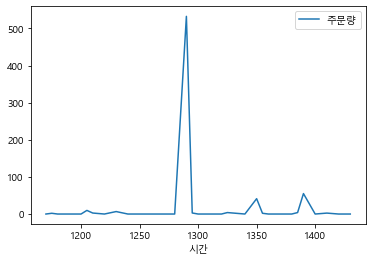

In [224]:
data.plot()

In [227]:
주말드라마.상품군.unique()

array(['주방', '속옷', '가전', '의류', '생활용품', '잡화', '농수축', '가구', '무형', '건강기능',
       '이미용', '침구'], dtype=object)

In [285]:
Hot_time = []
for i in 실적데이터.loc:
    if i.요일 >4 and 1275< i.시간 < 1300:
        Hot_time.append('1')
    else:
        Hot_time.append('0')

KeyError: 38300

In [297]:
data = pd.pivot_table(의류데이터,index='평균최고기온',columns = '월',values='주문량')

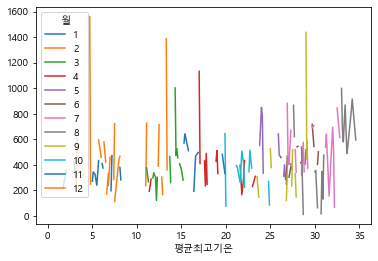

In [298]:
data.plot()